In [31]:
# Load the correct dataset provided by the user
df = pd.read_csv('Employee_Performance-1.csv')

# Perform initial exploration to understand the dataset
df_info = df.info()
df_head = df.head()
df_describe = df.describe()

# Check for duplicates
duplicates = df.duplicated().sum()

# Check for missing values
missing_values = df.isnull().sum()

(df_info, df_head, df_describe, duplicates, missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1468 entries, 0 to 1467
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EmployeeID         1468 non-null   int64  
 1   Department         1468 non-null   object 
 2   Gender             1468 non-null   object 
 3   Experience         1468 non-null   int64  
 4   TrainingHours      1468 non-null   int64  
 5   PerformanceRating  1468 non-null   float64
 6   Salary             1468 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 80.4+ KB


(None,
    EmployeeID Department  Gender  Experience  TrainingHours  \
 0        1001         IT    Male           4              5   
 1        1002  Marketing  Female           0             50   
 2        1003      Sales    Male           0              5   
 3        1004         HR    Male           1              5   
 4        1005         HR  Female           9              5   
 
    PerformanceRating  Salary  
 0               1.00   19000  
 1               5.50    6900  
 2               1.00    6000  
 3               1.00    6000  
 4               1.04   38000  ,
         EmployeeID   Experience  TrainingHours  PerformanceRating  \
 count  1468.000000  1468.000000    1468.000000        1468.000000   
 mean   1734.500000     2.838556      32.144414           3.561512   
 std     423.919411     2.527657      10.106029           1.044987   
 min    1001.000000     0.000000       5.000000           1.000000   
 25%    1367.750000     1.000000      25.000000           2.8400

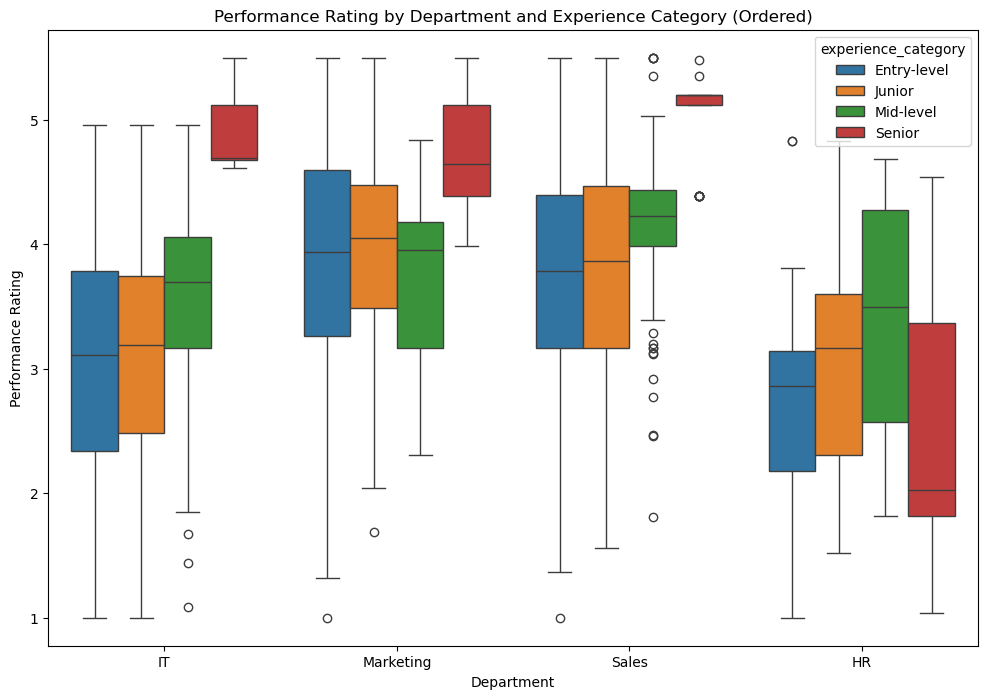

In [28]:
# Feature Engineering: Create experience_category based on Experience
def categorize_experience(exp):
    if exp >= 8:
        return 'Senior'
    elif exp >= 5:
        return 'Mid-level'
    elif exp >= 2:
        return 'Junior'
    else:
        return 'Entry-level'

# Apply the function to create the new column
df['experience_category'] = df['Experience'].apply(categorize_experience)

# Now we will create boxplots to visualize the relationships between departments, experience levels, and performance ratings
import matplotlib.pyplot as plt
import seaborn as sns



# Reorder the experience_category column to have 'Entry-level' first and 'Senior' last
experience_order = ['Entry-level', 'Junior', 'Mid-level', 'Senior']

# Re-plot the boxplot with the updated order for experience categories
plt.figure(figsize=(12, 8))

# Updated Boxplot: Performance Rating by Department and Experience Category (ordered)
sns.boxplot(x='Department', y='PerformanceRating', hue='experience_category', data=df,
            hue_order=experience_order)

# Set plot labels and title
plt.title('Performance Rating by Department and Experience Category (Ordered)')
plt.xlabel('Department')
plt.ylabel('Performance Rating')

# Show the plot
plt.show()

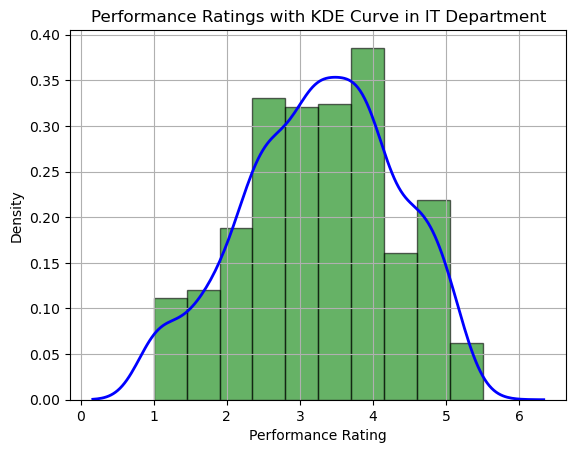

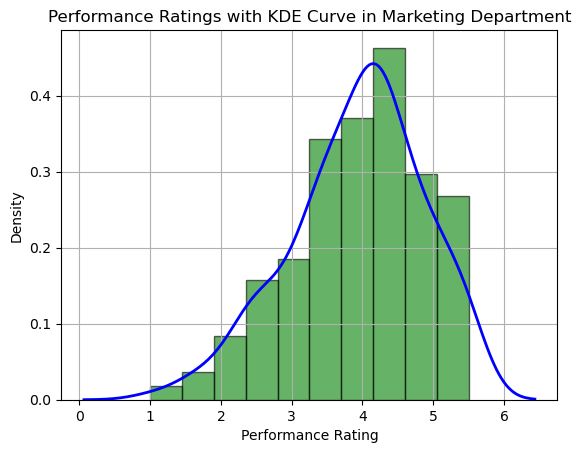

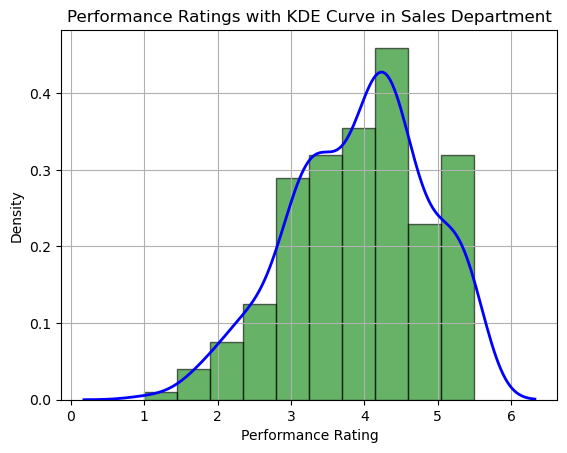

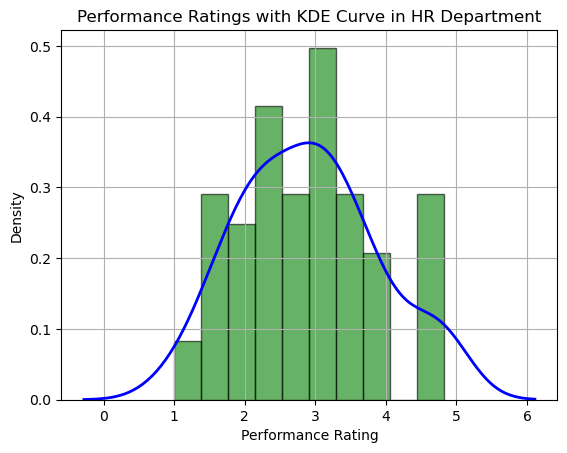

In [32]:
import numpy as np
departments = df['Department'].unique()


def plot_kde(department_data, department_name):
    plt.figure()

    # Sort the data
    sorted_data = np.sort(department_data)

    # Plot the histogram
    plt.hist(department_data, bins=10, density=True,
             alpha=0.6, color='g', edgecolor='black')

    # Plot the kernel density estimation (KDE)
    sns.kdeplot(department_data, color='b', linewidth=2)

    # Add labels and title
    plt.title(f'Performance Ratings with KDE Curve in {
              department_name} Department')
    plt.xlabel('Performance Rating')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


# Generate KDE plots for each department
for department in departments:
    subset = df[df['Department'] == department]['PerformanceRating']
    plot_kde(subset, department)

In [33]:
import scipy.stats as stats
# Extract the performance ratings and departments
performance_ratings = df['PerformanceRating']
departments = df['Department']

# Perform One-Way ANOVA
anova_result = stats.f_oneway(
    performance_ratings[departments == 'IT'],
    performance_ratings[departments == 'Marketing'],
    performance_ratings[departments == 'Sales'],
    performance_ratings[departments == 'HR']
)

# Gather the F-statistic and p-value
f_statistic = anova_result.statistic
p_value = anova_result.pvalue

# Calculate the critical value for F-distribution
alpha = 0.05
df_between = len(df['Department'].unique()) - 1
df_within = len(df) - len(df['Department'].unique())
critical_value = stats.f.ppf(1 - alpha, df_between, df_within)

# Output results
f_statistic, p_value, critical_value

(61.45485008981781, 2.0167687802345036e-37, 2.6109806399182016)

In [36]:
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD post-hoc test
tukey_test = pairwise_tukeyhsd(
    endog=performance_ratings, groups=departments, alpha=0.05)

# Extract the results of Tukey's test
tukey_summary = tukey_test.summary()

# Show the results
tukey_summary

group1,group2,meandiff,p-adj,lower,upper,reject
HR,IT,0.3715,0.0217,0.0384,0.7047,True
HR,Marketing,1.027,0.0,0.6681,1.386,True
HR,Sales,1.0256,0.0,0.6843,1.3669,True
IT,Marketing,0.6555,0.0,0.4665,0.8445,True
IT,Sales,0.6541,0.0,0.5012,0.807,True
Marketing,Sales,-0.0014,1.0,-0.2044,0.2017,False
